In [221]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [222]:
import pandas as pd
import numpy as np
import datetime as dt

In [223]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from flask import Flask, jsonify

In [224]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)
Base = automap_base()
Base.prepare(engine, reflect=True)

In [225]:
Base.classes.keys()

['measurement', 'station']

In [226]:
# save references 
Measurement = Base.classes.measurement
Station = Base.classes.station

session = Session(engine)


In [227]:
# Design a query to retrieve the last 12 months of precipitation data
# Select only the date and prcp values

measurement_results = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.prcp.desc()).all()
measurement_results

[('2014-07-20', 11.53),
 ('2016-07-25', 9.64),
 ('2011-01-13', 8.81),
 ('2013-11-10', 8.06),
 ('2014-07-20', 7.97),
 ('2016-07-25', 7.65),
 ('2015-09-15', 6.83),
 ('2016-09-14', 6.7),
 ('2011-12-13', 6.42),
 ('2012-03-06', 6.38),
 ('2011-01-13', 6.3),
 ('2017-04-29', 6.25),
 ('2012-03-05', 6.24),
 ('2014-07-20', 5.98),
 ('2013-01-03', 5.96),
 ('2012-03-05', 5.71),
 ('2014-07-20', 5.54),
 ('2013-11-10', 5.54),
 ('2012-03-05', 5.37),
 ('2016-07-25', 5.35),
 ('2012-03-07', 5.32),
 ('2011-01-13', 5.21),
 ('2016-04-18', 5.09),
 ('2017-02-11', 5.04),
 ('2010-12-20', 5.04),
 ('2010-12-20', 4.95),
 ('2010-12-20', 4.94),
 ('2011-02-20', 4.88),
 ('2015-08-24', 4.81),
 ('2013-11-10', 4.76),
 ('2012-03-03', 4.68),
 ('2012-03-09', 4.6),
 ('2010-11-06', 4.56),
 ('2011-10-24', 4.47),
 ('2011-06-04', 4.43),
 ('2013-08-10', 4.32),
 ('2014-07-20', 4.3),
 ('2016-07-25', 4.2),
 ('2015-09-28', 4.18),
 ('2013-05-30', 4.07),
 ('2014-12-23', 4.03),
 ('2011-06-05', 4.02),
 ('2010-10-19', 4.01),
 ('2012-03-06',

In [228]:
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
one_year_ago = dt.datetime.strptime(last_date, '%Y-%m-%d') - dt.timedelta(days=365)
one_year_ago

datetime.datetime(2016, 8, 23, 0, 0)

In [229]:
precipitation = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).\
    order_by(Measurement.date).all()

In [230]:
precipitation_df = pd.DataFrame(precipitation, columns=['date', 'precipitation'])
precipitation_df.set_index('date', inplace=True)
precipitation_df = precipitation_df.dropna()
precipitation_df.head()

,precipitation
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15


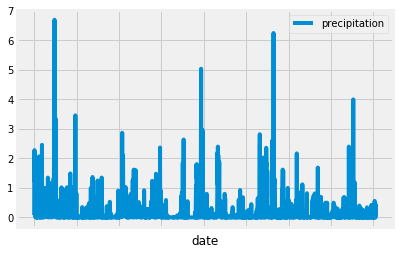

In [231]:
prcp = precipitation_df.plot().get_figure()



In [232]:
# print the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [233]:
#Station Analysis

# Design a query to calculate the total number of stations
Station = Base.classes.station
stations = session.query(Station).count()
print(f'Hay {stations} estaciones')

Hay 9 estaciones


In [234]:
# List the stations and observation counts in descending order.
stations = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.date).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [235]:
#Which station has the highest number of observations?
most_active = stations[0][0]
most_active

'USC00519281'

In [236]:
# Low, High, Average
record = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]
session.query(*record).filter(Measurement.station == most_active).first()

(54.0, 85.0, 71.66378066378067)

In [237]:
temperature = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active).filter(Measurement.date >= one_year_ago).\
    group_by(Measurement.date).all()

temperature

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-

In [238]:
temp_df = pd.DataFrame(data=temperature, columns=["date", "tobs"])
temp_df = temp_df.set_index('date', drop=True)
temp_df.head()

,tobs
date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0


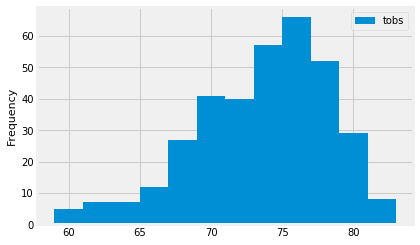

In [239]:
plt.hist(temp_df['tobs'],12, label="tobs")
plt.ylabel("Frequency", fontsize=11)
plt.legend()
plt.show()

In [240]:
from flask import Flask, jsonify
app = Flask(__name__)

In [ ]:
# Temperature

In [264]:
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2017-01-01', '2017-01-05'))

[(62.0, 68.13793103448276, 74.0)]


In [265]:
new_start_date = dt.date(2017, 1, 1) 
new_end_date = dt.date(2017, 1, 5)
def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= new_start_date).filter(Measurement.date <= new_end_date).all()
    
print(calc_temps ('2017-01-01', '2017-01-05'))

[(62.0, 68.13793103448276, 74.0)]


In [278]:
temp_df = pd.DataFrame(calc_temps ('2017-01-01', '2017-01-05'), columns=['min', 'avg', 'max'])
temp_df

,min,avg,max
0,62.0,68.137931,74.0


([], <a list of 0 Text xticklabel objects>)

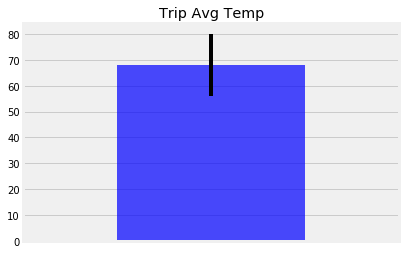

In [280]:
temp_df['avg'].plot(kind='bar', color='blue', alpha=0.7, yerr=temp_df['max'] - temp_df['min'])
plt.title("Trip Avg Temp")
plt.xticks([])